In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Загрузка изображения
img = Image.open('panda.jpg')
w, h = img.size

# Перевод в градации серого
gray_img = img.convert('L')
X = np.array(gray_img, dtype=np.float32)

In [7]:
# Функция для выполнения SVD и восстановления изображения с заданным количеством сингулярных значений
def svd_compression(X, num_singular_values):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    S_reduced = np.zeros_like(S)
    S_reduced[:num_singular_values] = S[:num_singular_values]
    Sigma = np.diag(S_reduced)
    X_approx = U @ Sigma @ Vt
    X_approx_clipped = np.clip(X_approx, 0, 255)
    return X_approx_clipped.astype(np.uint8)

In [9]:
# Список количества сингулярных значений
singular_values_list = [1, 2, 10, 30, 100]

# Создаем список для хранения имен файлов
output_filenames = []

# Обработка и сохранение изображений
for k in singular_values_list:
  X_reconstructed = svd_compression(X, k)
  img_reconstructed = Image.fromarray(X_reconstructed)
  filename = f'compressed_{k}.png'
  img_reconstructed.save(filename)
  output_filenames.append(filename)
  print(f'Сохранено изображение с {k} сингулярными значениями: {filename}')


Сохранено изображение с 1 сингулярными значениями: compressed_1.png
Сохранено изображение с 2 сингулярными значениями: compressed_2.png
Сохранено изображение с 10 сингулярными значениями: compressed_10.png
Сохранено изображение с 30 сингулярными значениями: compressed_30.png
Сохранено изображение с 100 сингулярными значениями: compressed_100.png


In [11]:
# Получение размера файла
def get_file_size(filename):
    with open(filename, 'rb') as f:
        f.seek(0, 2)  # перейти в конец файла
        size = f.tell()
    return size

In [13]:
# Сравнение размеров
original_size = get_file_size('panda.jpg')
print(f'Размер исходного файла: {original_size} байт')

for filename in output_filenames:
    size = get_file_size(filename)
    print(f'Размер файла {filename}: {size} байт')

Размер исходного файла: 95132 байт
Размер файла compressed_1.png: 74493 байт
Размер файла compressed_2.png: 90100 байт
Размер файла compressed_10.png: 126701 байт
Размер файла compressed_30.png: 158250 байт
Размер файла compressed_100.png: 193955 байт


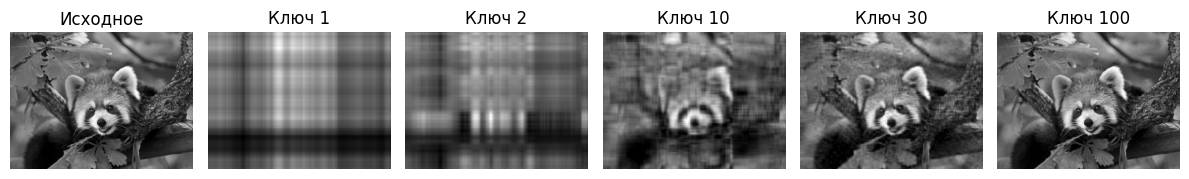

In [14]:
# Визуализация
plt.figure(figsize=(12, 6))
plt.subplot(2, len(singular_values_list)+1, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Исходное')
plt.axis('off')

for i, filename in enumerate(output_filenames):
    img = Image.open(filename)
    plt.subplot(2, len(singular_values_list)+1, i+2)
    plt.imshow(img, cmap='gray')
    plt.title(f'Ключ {singular_values_list[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()